In [3]:
# 適当にインポート
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# シンプルデータセット３
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

# 【問題1】中心点の初期値を決める

In [5]:
def center_initial(x_array, k=5):
    np.random.seed(seed=0)
    ns = []
    X_center = np.empty((0,x_array.shape[1]), int)
    while len(ns) < k:
        n = random.randint(0, x_array.shape[0] - 1)
        if not n in ns:
            ns.append(n)
        else:
            pass
    for i in ns:
        X_center = np.vstack((X_center, X[i]))

    return X_center

Xcen = center_initial(X,k=5)
# print(X)
Xcen


array([[-1.64996061,  7.49068513],
       [ 2.14398059,  0.69677319],
       [ 0.5323772 ,  3.31338909],
       [ 0.96217896,  4.51795326],
       [-1.86407034,  2.93379754]])

# 【問題2】SSEを求める関数の作成

In [6]:
#クラスタを割り当てる
def allocation(x_array,X_center):
    rnk = np.zeros((x_array.shape[0],X_center.shape[0]), int)
    x_matrix_3d =  np.empty((X_center.shape[0],x_array.shape[0],x_array.shape[1]), float)
    for i in range(X_center.shape[0]):
        for j in range(x_array.shape[0]):
            x_matrix_3d[i,j] = (X[j] - X_center[i])*(X[j] - X_center[i])
    
    x_matrix_2d = np.sum(x_matrix_3d,axis=2)
    min_array = np.argmin(x_matrix_2d, axis=0)
    for k in range(x_array.shape[0]):
        rnk[k,min_array[k]] = 1
    
    sse = np.sum(rnk.T*x_matrix_2d)
    
    return sse ,rnk ,x_matrix_3d,x_matrix_2d

a,b,c,d = allocation(X,center_initial(X,k=5))
print(a)
# print(b.shape)
print(c.shape)
print(c)
print(d.shape)
print(d)

301.21547231271916
(5, 100, 2)
[[[4.24178228e+00 1.80980349e+00]
  [3.09128196e-01 3.13690008e+01]
  [7.26561345e+00 3.98578453e+00]
  [5.72374542e+00 4.51429366e+00]
  [8.58552508e+00 6.43533083e+00]
  [4.49990485e+00 3.18427639e+00]
  [3.82945133e-01 2.26422102e+00]
  [3.19389862e-01 3.03717137e+01]
  [2.13693593e+00 8.47388117e+00]
  [8.86524803e-03 2.85967034e+01]
  [1.68511265e-01 2.17044186e+01]
  [1.67831312e-01 2.20420165e+01]
  [5.01179947e-03 2.38459489e+01]
  [1.23955963e-01 2.89605959e+01]
  [2.69206131e-01 2.64377509e+01]
  [1.87968561e+01 4.59844165e+00]
  [7.88147829e+00 2.48709284e-01]
  [1.00673053e+00 1.04436165e+00]
  [2.76023194e-01 3.19921091e-01]
  [1.57105936e+01 4.35945635e+00]
  [1.19013866e+01 1.46028524e+00]
  [2.33577782e-01 2.75453680e+01]
  [3.28524769e-01 6.71293441e-01]
  [1.31536056e+01 5.01150927e+00]
  [3.48654057e+00 4.53288248e+00]
  [5.63772919e-02 4.75071074e-02]
  [5.97928318e-01 1.66399110e+00]
  [4.58390349e+00 4.05530967e+00]
  [1.71237464e+01

# 【問題3】クラスタへの割り当て

In [7]:
#クラスタを割り当てる
def allocation(x_array,X_center):
    rnk = np.zeros((x_array.shape[0],X_center.shape[0]), int)
    x_matrix_3d =  np.empty((X_center.shape[0],x_array.shape[0],x_array.shape[1]), float)
    for i in range(X_center.shape[0]):
        for j in range(x_array.shape[0]):
            x_matrix_3d[i,j] = (X[j] - X_center[i])*(X[j] - X_center[i])
    
    x_matrix_2d = np.sum(x_matrix_3d,axis=2)
    print(x_matrix_2d.shape)
    print(x_matrix_3d.shape)
    min_array = np.argmin(x_matrix_2d, axis=0)
    for k in range(x_array.shape[0]):
        rnk[k,min_array[k]] = 1
    
    sse = np.sum(rnk.T*x_matrix_2d)
    
    return sse ,rnk ,min_array

a,b,c = allocation(X,center_initial(X,k=5))
print(b.shape)
print(c)

(5, 100)
(5, 100, 2)
(100, 5)
[3 2 4 4 4 3 0 2 2 2 2 2 2 2 2 1 1 3 0 1 4 2 0 1 3 0 0 3 1 1 1 2 1 1 0 3 2
 1 2 0 4 0 2 0 0 2 1 0 3 3 2 1 0 0 0 2 2 1 1 2 2 1 1 4 1 2 0 0 1 4 2 1 3 2
 3 4 0 0 1 1 1 2 0 2 1 0 1 1 4 4 4 0 3 0 0 2 2 0 2 2]


# 【問題4】中心点の移動

In [8]:
def center_move(X,rnk):
    cen =  rnk.T@X/((np.sum(rnk,axis=0)).reshape(5,1))
#     print((rnk.T@X).shape)
#     print((np.sum(rnk,axis=0)).reshape(1,5))
    return cen
center_move(X,b)

array([[-1.52702451,  3.10579592],
       [ 1.99186903,  0.96561071],
       [-1.08140791,  7.34118234],
       [ 0.66012928,  3.9748517 ],
       [ 1.38234129,  4.45327091]])

# 【問題5】繰り返し
繰り返しが指定した回数に到達する。
<br>
（雛形では引数max_iter）中心点μkと重心の差が指定した許容値以下になる。（雛形では引数tol）

In [9]:
class ScratchKMeans():
    """
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters=5, n_init = 5, max_iter = 1000, tol = 0.001, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
    def center_initial(self):
        np.random.seed(seed=random.randint(0,30))
        ns = []
        X_center = np.empty((0,self.X.shape[1]), int)
        while len(ns) < self.n_clusters:
            n = random.randint(0, self.X.shape[0] - 1)
            if not n in ns:
                ns.append(n)
            else:
                pass
        for i in ns:
            X_center = np.vstack((X_center, self.X[i]))
        self.X_center = X_center
#         print(self.X_center.shape)
        
    def fit(self, X):
        self.X = X
        self.sse_min = 1000000000000000
        # 初期値設定回数
        for m in range(self.n_init):
            self.center_initial()
            sse_list = [1,0]
            center_list = np.empty((self.X_center.shape[0],self.X.shape[1],1), float)
            rnk = np.zeros((self.X.shape[0],self.X_center.shape[0]), int)
            x_matrix_3d =  np.empty((self.X_center.shape[0],self.X.shape[0],self.X.shape[1]), float)
            # 最大インテレーション回数
            for l in range(self.max_iter):
    #             print(len(sse_list))
                # SSEの値が変化しなくなったらブレイク
                if sse_list[l+1] == sse_list[l]:
                    break
                else:
                    # 中心の位置の変化が閾値以下になったらブレイク
                    if l > 1 and \
                        np.linalg.norm(center_list[0,:,-2] - center_list[0,:,-1])\
                            + np.linalg.norm(center_list[1,:,-2] - center_list[1,:,-1])\
                            <= self.tol:
#                             + np.linalg.norm(center_list[2,:,-2] - center_list[2,:,-1])\
                        break
                    else:               
                        for i in range(self.X_center.shape[0]):
                            for j in range(self.X.shape[0]):
                                x_matrix_3d[i,j] = (self.X[j] - self.X_center[i])*(self.X[j] - self.X_center[i])

                            x_matrix_2d = np.sum(x_matrix_3d,axis=2)       
                            min_array = np.argmin(x_matrix_2d, axis=0)
                            rnk = np.zeros((self.X.shape[0],self.X_center.shape[0]), int)
                            for k in range(self.X.shape[0]):
                                rnk[k,min_array[k]] = 1

                            self.rnk = rnk
                        # 以下リスト管理
                        self.sse = np.sum(self.rnk.T*x_matrix_2d)
#                         print(self.rnk)
#                         print(self.sse)
                        sse_list.append(self.sse)

                        if sse_list[-1] <= self.sse_min:
                            self.sse_min = self.sse
                            self.center = self.X_center
                            self.rnk_min = self.rnk
                            self.min_array = min_array
                        self.center_move()
#                         print(self.X_center)
                        center_list = np.append(center_list, self.X_center.reshape(self.n_clusters, 2, 1), axis=2)
        self.center_list = center_list
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            pass
    
    def center_move(self):
        cen =  self.rnk.T@self.X/((np.sum(self.rnk,axis=0)).reshape(self.n_clusters,1))
        self.X_center = cen
        
    def predict(self, X):
        rnk = np.zeros((X.shape[0],self.center.shape[0]), int)
        x_matrix_3d =  np.empty((self.center.shape[0],X.shape[0],X.shape[1]), float)
        for i in range(self.center.shape[0]):
            for j in range(X.shape[0]):
                x_matrix_3d[i,j] = (X[j] - self.center[i])*(X[j] - self.center[i])
    
        x_matrix_2d = np.sum(x_matrix_3d,axis=2)
        min_array = np.argmin(x_matrix_2d, axis=0)
        
        pass
        return min_array

# 【問題7】推定

In [149]:
clf = ScratchKMeans()
clf.fit(X)
# print(X[1:5])
y_pred = clf.predict(X)
print(y_pred)
print(clf.sse_min)
# print(clf.center)
# print(clf.center_list.shape)

[3 0 3 3 3 3 2 0 3 0 0 0 0 0 0 4 4 1 2 4 3 0 2 4 3 2 1 3 4 4 4 0 4 4 2 3 0
 4 0 2 3 2 0 2 2 0 4 2 3 1 3 4 2 2 2 0 0 4 4 0 0 4 4 3 4 0 2 2 4 3 0 4 3 0
 3 3 1 2 4 4 4 0 2 1 4 2 4 4 3 3 3 2 1 2 2 0 0 2 0 1]
43.005198671637025


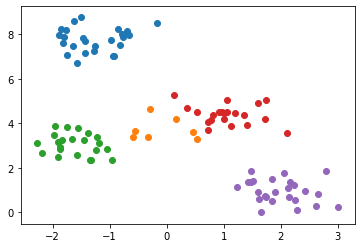

In [150]:
df = np.append(X,y_pred.reshape(100,1),axis=1)
# print(df)
def scatter_make(x_line,y_line): #縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
    x = x_line
    y = y_line
    plt.scatter(x, y)# 散布図を描画

for i in range(5):
    scatter_make(df[np.any(df == i, axis=1)][:,0],df[np.any(df == i, axis=1)][:,1])


In [151]:
clf3 = ScratchKMeans(n_clusters=3)
clf3.fit(X)
# print(X[1:5])
y_pred = clf3.predict(X)
print(y_pred)
print(clf3.sse_min)
print(clf3.center)

[2 1 2 2 2 2 2 1 2 1 1 1 1 1 1 0 0 2 2 0 2 1 2 0 2 2 2 2 0 0 0 1 0 0 2 2 1
 0 1 2 2 2 1 2 2 1 0 2 2 2 2 0 2 2 2 1 1 0 0 1 1 0 0 2 0 1 2 2 0 2 1 0 2 1
 2 2 2 2 0 0 0 1 2 2 0 2 0 0 2 2 2 2 2 2 2 1 1 2 1 2]
139.17097772033804
[[ 1.99186903  0.96561071]
 [-1.26811733  7.76378266]
 [-0.27678616  3.72096344]]


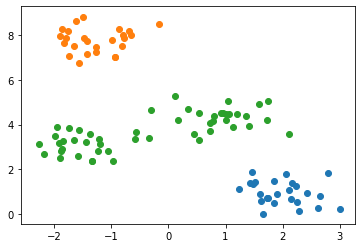

In [152]:
df = np.append(X,y_pred.reshape(100,1),axis=1)
# print(df)
def scatter_make(x_line,y_line): #縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
    x = x_line
    y = y_line
    plt.scatter(x, y)# 散布図を描画

for i in range(3):
    scatter_make(df[np.any(df == i, axis=1)][:,0],df[np.any(df == i, axis=1)][:,1])



# 【問題8】エルボー法の実装

In [153]:
sse_list = []
for i in range(2,20):
    clf_n = ScratchKMeans(n_clusters=i)
    clf_n.fit(X)
    sse_list.append(clf_n.sse_min)
print(sse_list)

[351.4837286512543, 139.17097772033804, 48.63378320706403, 43.293590108479734, 38.09452605617932, 34.985071234859845, 32.09854674995367, 27.623218019935667, 23.810495493920225, 21.65782598136353, 19.494530963041544, 19.24148897309161, 17.109262758283105, 16.709011681789374, 12.740379673915243, 15.558916424748752, 13.643145619578881, 12.269860749376402]


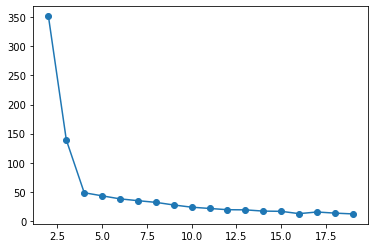

In [154]:
plt.plot(range(2,20), sse_list,marker="o")

# 【問題9】（アドバンス課題）シルエット図

- silhouette_vals : shape(n_samples,)のndarray、各データ点のシルエット係数
- silhouette_avg : float、シルエット係数の平均値
- y_km : shape(n_samples,)のndarray、各データ点のクラスタラベル名
- cluster_labels : list、クラスタのラベル名のリスト
- n_clusters : int、クラスタ数

In [155]:
from matplotlib import cm
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

NameError: name 'cluster_labels' is not defined

卸売業者のデータインポート

In [156]:
data = pd.read_csv('/Users/suzukiyuuta/Downloads/Wholesale customers data.csv')
print(data.columns)
data = data.drop('Channel',axis=1)
data = data.drop('Region',axis=1)
print(data.columns)

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')
Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')


次元削減

In [157]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)
print(data_pca.shape)

(440, 2)


[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


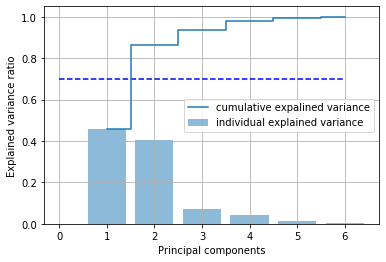

In [158]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

# 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 $k$ を選択してください。<br>
エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。<br>
選択した上で、なぜそれを選んだか説明してください。

In [159]:
clf_wholesale = ScratchKMeans(n_clusters=5)
clf_wholesale.fit(data_pca)
# print(X[1:5])
print(clf_wholesale.sse_min)
print(clf_wholesale.center)

32044670443.78015
[[37704.64157991 -5488.35405895]
 [-5607.91709853 14199.18040025]
 [-6399.7117556  -4169.29690862]
 [14537.71774395 61715.67085248]
 [ 9052.39957144 -4808.55909102]]


In [160]:
y_pred_wholesale = clf_wholesale.predict(data_pca)
print(y_pred_wholesale)

[2 2 2 2 4 2 2 2 2 1 1 2 4 4 4 2 1 2 4 2 4 2 4 1 4 4 2 2 1 0 4 2 4 4 2 2 4
 1 1 0 4 4 1 1 2 1 1 3 2 1 2 2 0 1 4 2 1 1 2 2 2 3 2 1 2 3 2 4 2 2 4 4 2 4
 2 4 2 1 2 2 2 1 2 4 2 3 3 0 2 4 2 2 1 4 1 2 2 2 2 2 1 1 2 0 2 4 2 1 2 1 2
 1 4 4 4 2 2 2 4 2 4 2 2 2 4 0 4 4 2 0 2 2 4 2 2 2 2 2 2 2 4 4 0 2 4 1 2 2
 2 4 4 2 4 2 2 1 1 4 2 1 2 2 4 1 2 1 2 2 2 2 1 1 2 1 2 1 0 2 2 2 2 0 1 0 2
 2 2 2 1 1 4 2 2 1 2 4 4 2 2 2 1 1 4 2 2 1 2 2 2 1 4 3 2 2 1 1 1 4 1 2 4 2
 2 2 2 2 4 2 2 2 2 2 4 2 4 2 2 4 2 0 4 4 4 2 2 1 2 2 4 2 2 1 2 4 2 4 2 2 0
 0 2 2 4 2 1 1 1 4 1 4 2 2 2 0 2 2 4 2 2 4 2 2 0 4 0 0 2 4 4 0 2 2 2 1 4 2
 4 2 2 2 4 1 2 1 1 1 1 4 2 1 2 4 1 2 2 1 2 2 2 1 2 2 4 2 4 0 2 2 4 2 2 1 4
 3 4 4 2 2 2 2 2 2 2 1 2 2 1 4 2 1 2 1 2 1 4 2 4 1 2 2 4 2 2 2 2 2 2 2 4 2
 0 4 2 4 2 2 1 0 2 2 4 4 4 2 1 2 2 4 2 2 2 2 2 4 2 2 1 2 2 2 2 4 4 4 4 2 4
 1 2 2 2 2 2 2 2 2 1 2 1 2 1 4 4 4 4 2 1 4 2 2 1 2 4 2 4 4 0 1 2 2]


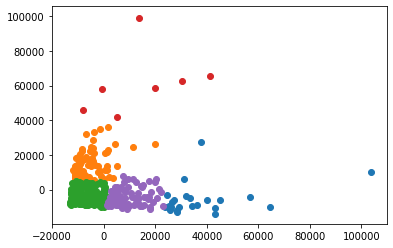

In [161]:
df_wholesale = np.append(data_pca,y_pred_wholesale.reshape(440,1),axis=1)
# print(df)
def scatter_make(x_line,y_line): #縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
    x = x_line
    y = y_line
    plt.scatter(x, y)# 散布図を描画

for i in range(5):
    scatter_make(df_wholesale[np.any(df_wholesale == i, axis=1)][:,0],df_wholesale[np.any(df_wholesale == i, axis=1)][:,1])

In [163]:
sse_list = []
for i in range(2,20):
    clf_wholesale_n = ScratchKMeans(n_clusters=i)
    clf_wholesale_n.fit(data_pca)
    sse_list.append(clf_wholesale_n.sse_min)
print(sse_list)

[91919932364.82272, 59085149481.99059, 43987034372.52697, 32050894205.465668, 26696465957.644886, 21763696845.356964, 19717562203.39581, 16783538479.347378, 15508064060.52704, 13971575807.22255, 12373731827.597244, 12285834031.91448, 11055961897.21493, 10103694857.311893, 10401783282.83259, 8265783440.682057, 7982945193.119174, 8403897526.043648]


In [164]:
print(len(sse_list))

18


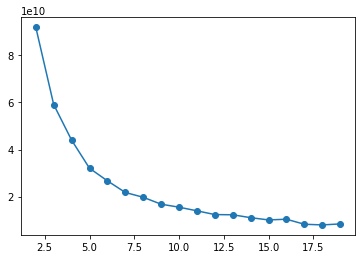

In [165]:
plt.plot(range(2,20), sse_list,marker="o")

In [166]:
clf_wholesale = ScratchKMeans(n_clusters=5)
clf_wholesale.fit(data_pca)
# print(X[1:5])
print(clf_wholesale.sse_min)
print(clf_wholesale.center)

32444452021.81855
[[-6404.07020138 -4249.40843333]
 [ 8916.05497932 -4762.41444628]
 [-6083.11513044 13269.34205431]
 [37090.26267941 -5656.14400877]
 [12187.79784178 52935.26049389]]


In [167]:
y_pred_wholesale = clf_wholesale.predict(data_pca)
print(y_pred_wholesale)

[0 0 0 0 1 0 0 0 0 2 2 0 1 1 1 0 2 0 1 0 1 0 1 4 1 1 0 0 2 3 1 0 1 1 0 0 1
 2 2 3 1 1 2 2 0 2 2 4 0 2 0 0 3 2 1 0 2 2 0 0 0 4 0 2 0 4 0 1 0 0 1 1 0 1
 0 1 0 2 0 0 0 2 2 1 0 4 4 3 0 1 0 0 4 1 2 0 0 0 0 0 2 2 0 3 0 1 2 2 0 2 0
 2 1 1 1 0 0 0 1 0 1 0 0 0 3 3 1 1 0 3 0 0 1 0 0 0 0 0 0 0 1 1 3 0 1 2 0 0
 0 1 1 0 1 0 0 2 2 1 0 2 0 0 1 2 0 2 0 0 0 0 2 2 0 2 0 2 3 0 0 0 0 3 2 3 0
 0 0 0 2 2 1 0 0 2 0 1 1 0 0 0 2 2 1 0 0 2 0 0 0 2 1 4 0 0 2 2 2 1 2 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 3 1 1 1 0 0 2 0 0 1 0 0 2 0 1 0 1 0 0 3
 3 0 0 1 0 2 2 2 1 2 1 0 0 0 3 0 0 1 0 0 1 0 0 3 1 3 3 0 1 1 3 0 0 0 2 1 0
 1 0 0 0 1 2 0 2 2 2 2 1 0 2 0 1 2 0 0 2 0 0 0 2 0 0 1 0 1 3 0 0 1 0 0 2 1
 4 1 1 0 0 0 0 0 0 0 2 0 0 2 1 0 2 0 2 0 2 1 0 1 2 0 0 1 0 0 0 0 0 0 0 1 0
 3 1 0 1 0 0 2 3 0 0 1 1 1 0 2 0 0 1 0 0 0 0 0 1 0 0 2 0 0 0 0 1 1 1 1 0 1
 2 0 0 0 0 0 0 0 0 2 0 2 0 2 1 1 1 1 0 2 1 0 0 2 0 1 0 1 1 3 2 0 0]


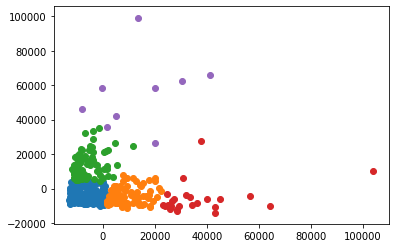

In [168]:
df_wholesale = np.append(data_pca,y_pred_wholesale.reshape(440,1),axis=1)
# print(df)
def scatter_make(x_line,y_line): #縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
    x = x_line
    y = y_line
    plt.scatter(x, y)# 散布図を描画

for i in range(5):
    scatter_make(df_wholesale[np.any(df_wholesale == i, axis=1)][:,0],df_wholesale[np.any(df_wholesale == i, axis=1)][:,1])

→
クラスター数は”5”<br>
理由：
- エルボー法で角付近に来ている
- クラスター分析する上で煩雑になりすぎないクラスター数である
- 散布図で見る限りでも5クラスが妥当に感じる
 

# 【問題11】既知のグループとの比較

In [169]:
# データのインポート
data_all = pd.read_csv('/Users/suzukiyuuta/Downloads/Wholesale customers data.csv')
data_drop_cha = data_all['Channel']
data_drop_reg = data_all['Region']

print("販売チャネルのクラスは" + str(data_drop_cha.unique().tolist()))
print("販売地域のクラスは" + str(data_drop_reg.unique().tolist()))

販売チャネルのクラスは[2, 1]
販売地域のクラスは[3, 1, 2]


In [170]:
def scatter_make1(x_line,y_line): #縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
    x = x_line
    y = y_line
    plt.scatter(x, y,s=3)# 散布図を描画

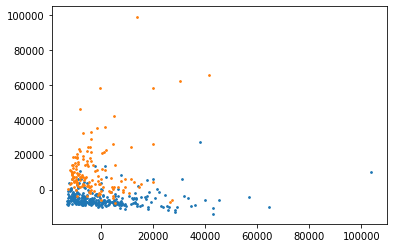

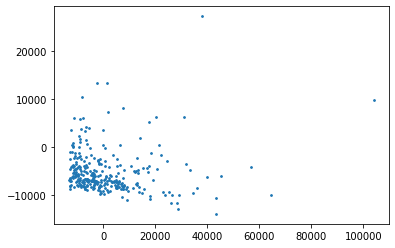

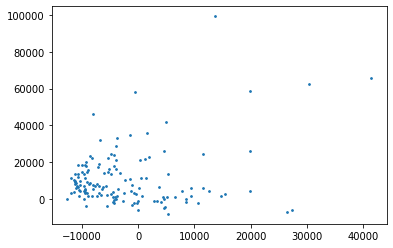

In [171]:
# 販売チャネルのクラスを可視化
df_wholesale = np.append(data_pca,np.array(data_drop_cha).reshape(440,1),axis=1)
# print(df)
for i in range(1,3):
    scatter_make1(df_wholesale[np.any(df_wholesale == i, axis=1)][:,0],df_wholesale[np.any(df_wholesale == i, axis=1)][:,1])
plt.show()
for i in range(1,3):
    scatter_make1(df_wholesale[np.any(df_wholesale == i, axis=1)][:,0],df_wholesale[np.any(df_wholesale == i, axis=1)][:,1])
    plt.show()

コメント:
販売チャネルごとに特徴に差異があることが確認できた

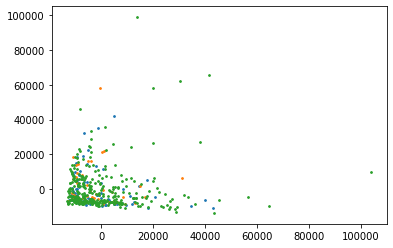

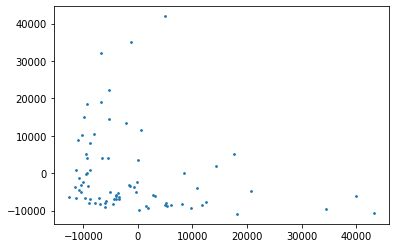

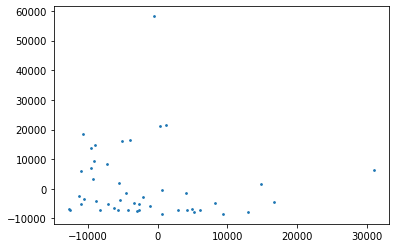

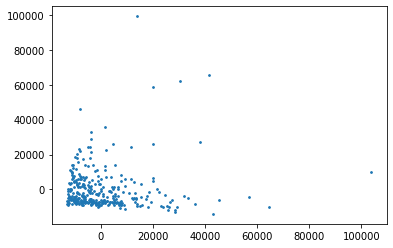

In [172]:
# 販売地域のクラスを可視化
df_wholesale = np.append(data_pca,np.array(data_drop_reg).reshape(440,1),axis=1)
# print(df)

for i in range(1,4):
    scatter_make1(df_wholesale[np.any(df_wholesale == i, axis=1)][:,0],df_wholesale[np.any(df_wholesale == i, axis=1)][:,1])
plt.show()
for i in range(1,2):
    scatter_make1(df_wholesale[np.any(df_wholesale == i, axis=1)][:,0],df_wholesale[np.any(df_wholesale == i, axis=1)][:,1])
    plt.show()
for i in range(2,3):
    scatter_make1(df_wholesale[np.any(df_wholesale == i, axis=1)][:,0],df_wholesale[np.any(df_wholesale == i, axis=1)][:,1])
    plt.show()
for i in range(3,4):
    scatter_make1(df_wholesale[np.any(df_wholesale == i, axis=1)][:,0],df_wholesale[np.any(df_wholesale == i, axis=1)][:,1])
    plt.show()    

コメント:
販売地域１と２については大きな違いは見受けられないが、３についてはその他と明確に差異があることが確認できた

# 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。

In [173]:
display(data)
display(data.describe())
df_columns = list(data.columns)
for i in df_columns:
    print(i + str(type(data.at[0,i])))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Fresh<class 'numpy.int64'>
Milk<class 'numpy.int64'>
Grocery<class 'numpy.int64'>
Frozen<class 'numpy.int64'>
Detergents_Paper<class 'numpy.int64'>
Delicassen<class 'numpy.int64'>


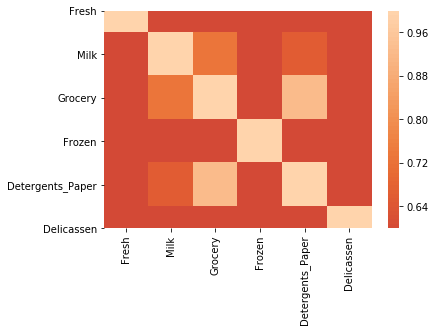

                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicassen        0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicassen  
Fresh               0.244690  
Milk                0.406368  
Grocery             0.205497  
Frozen              0.390947  
Detergents_Paper    0.069291  
Delicassen          1.000000  


In [174]:
# ヒートマップを作成する
sns.heatmap(data.corr(method='pearson'),
            vmin=0.6,
            vmax=1.0,
            center=0,
#             annot=True, # True:格子の中に値を表示
#             fmt='.1f',
#             xticklabels=df.corr(method='pearson').columns.values,
#             yticklabels=df.corr(method='pearson').columns.values
           )
plt.show()
data_final = data.corr(method='pearson')
print(data_final)

# 分析方針について
- 各特徴量感の相関は大きくないため、分析においては特徴量削減は行わない
- 販売チャネルの違いによる購買行動には差異が見受けられるため、個別にクラスタリングを行う
- 販売地域については１と２は１クラスとして、３と区別し個別にクラスタリングを行う
- （販売チャネル*販売地域の４パターンに分けて分析）

In [44]:
# データの分割（地域と販売チャネルで４クラスに分類）
class_list = np.empty((440,1), int)
np_data_all = np.array(data_all)

# data_all.at[0, 'Channel']
# data_all.at[i,'Region']
# 
#クラス１：都市部＊商業施設
#クラス２：都市部＊小売業者
#クラス３：郊外＊商業施設
#クラス４：郊外＊小売業者

for i in range(np_data_all.shape[0]):
    if data_all.at[i,'Channel'] == 1 and data_all.at[i,'Region'] == 1:
        class_list[i] = 1
    elif data_all.at[i,'Channel'] == 1 and data_all.at[i,'Region'] == 2:
        class_list[i] = 1
    elif data_all.at[i,'Channel'] == 1 and data_all.at[i,'Region'] == 3:
        class_list[i] = 2
    elif data_all.at[i,'Channel'] == 2 and data_all.at[i,'Region'] == 1:
        class_list[i] = 3
    elif data_all.at[i,'Channel'] == 2 and data_all.at[i,'Region'] == 2:
        class_list[i] = 3
    elif data_all.at[i,'Channel'] == 2 and data_all.at[i,'Region'] == 3:
        class_list[i] = 4
    else:
        print()
        
print(class_list.shape)

(440, 1)


In [124]:
#ラベルをデータに結合
data_0 = pd.concat([data, pd.DataFrame(class_list,columns=["class"])], axis=1)
print(data_0)

#クラスごとに平均を算出
sample_data = data_0.groupby(pd.Grouper("class")).mean()
print(sample_data)
sample_data = sample_data.groupby(["class"], as_index=False).mean()

# .groupby(['city', 'food'], as_index=False).mean()
# print(data)
# print(pd.DataFrame(class_list,columns=["class"]))
print(sample_data)
#データを標準化
standardized_sample_data = (sample_data - sample_data.mean()) / sample_data.std()
standardized_sample_data = standardized_sample_data + 2.5
print(standardized_sample_data)
standardized_sample_data = pd.concat([standardized_sample_data, pd.DataFrame([0,1,2,3],columns=["class"])], axis=1)

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  class
0    12669   9656     7561     214              2674        1338      4
1     7057   9810     9568    1762              3293        1776      4
2     6353   8808     7684    2405              3516        7844      4
3    13265   1196     4221    6404               507        1788      2
4    22615   5410     7198    3915              1777        5185      4
..     ...    ...      ...     ...               ...         ...    ...
435  29703  12051    16027   13135               182        2204      2
436  39228   1431      764    4510                93        2346      2
437  14531  15488    30243     437             14841        1867      4
438  10290   1981     2232    1038               168        2125      2
439   2787   1698     2510      65               477          52      2

[440 rows x 7 columns]
              Fresh          Milk       Grocery       Frozen  \
class                                           

In [125]:
standardized_sample_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3.060888,1.623732,1.654397,3.476890,1.644904,1.213991,0
1,3.472447,1.653259,1.619137,3.216248,1.641565,2.512918,1
2,1.202205,3.237399,3.459912,1.876271,3.535377,2.619035,2
3,2.264460,3.485610,3.266553,1.430591,3.178154,3.654056,3


['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


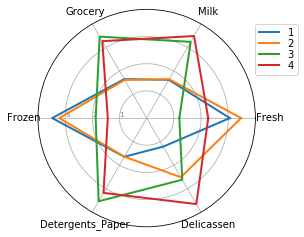

In [140]:
#　レーダーチャートを作る（練習）
from math import pi
# Set data
df = standardized_sample_data
#　カテゴリ名を取得
categories=list(df)[:-1] 
print(categories)
#　カテゴリ数を取得
N = len(categories)

# print(values)
# カテゴリを表示する角度ラジアンを作成
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles,N

# レーダーチャートの種類？を設定
ax = plt.subplot(111, polar=True)
# Xラベルと
plt.xticks(angles[:-1], categories, color='black', size=10)
ax.set_rlabel_position(180)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=7)
plt.ylim(0,4)
# Plot data
for i in range(df.shape[0]):
    values=df.loc[i].drop('class').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid')

legend_info = ('1', '2','3', '4')
plt.legend(legend_info, loc=(1, 0.7), labelspacing=0.1, fontsize='medium')
# Fill area
# ax.fill(angles, values,'r', alpha=0.2)
# plt.savefig('radar_cacti.jpg',dpi=150)

In [247]:
#クラスごとにデータを分割
class1_data = data_0[data_0['class'] == 1].drop('class', axis=1)
class2_data = data_0[data_0['class'] == 2].drop('class', axis=1)
class3_data = data_0[data_0['class'] == 3].drop('class', axis=1)
class4_data = data_0[data_0['class'] == 4].drop('class', axis=1)

In [189]:
pca = PCA(n_components = 2)
pca = pca.fit(class1_data)
class1_data_pca = pca.transform(class1_data)
print(class1_data_pca.shape)
pca = pca.fit(class1_data)
class2_data_pca = pca.transform(class2_data)
print(class2_data_pca.shape)
pca = pca.fit(class1_data)
class3_data_pca = pca.transform(class3_data)
print(class3_data_pca.shape)
pca = pca.fit(class1_data)
class4_data_pca = pca.transform(class4_data)
print(class4_data_pca.shape)

(87, 2)
(211, 2)
(37, 2)
(105, 2)


[0.64110906 0.88150647 0.96696398 0.99246382 0.99700241 1.        ]


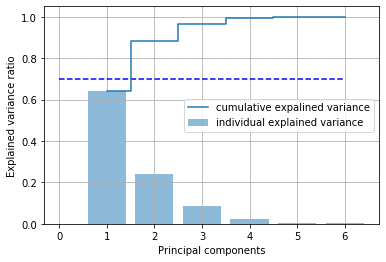

In [188]:
pca = PCA(n_components=None)
pca = pca.fit(class1_data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

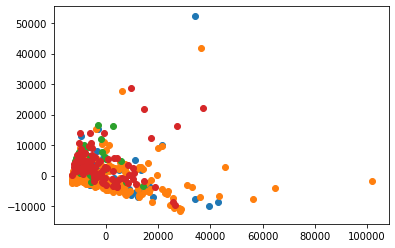

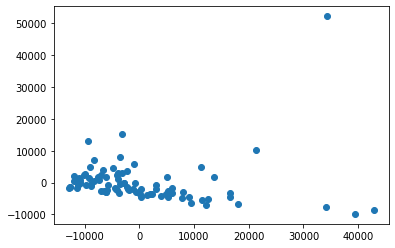

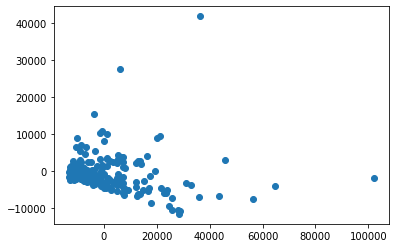

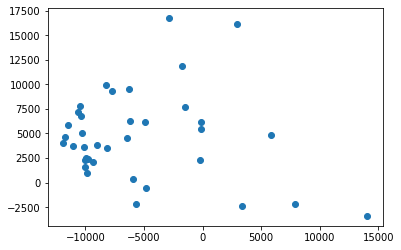

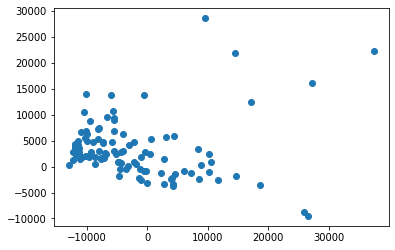

In [194]:
#クラス１：都市部＊商業施設(サンプル数８７)
#クラス２：都市部＊小売業者(サンプル数２１１)
#クラス３：郊外＊商業施設(サンプル数３７)
#クラス４：郊外＊小売業者(サンプル数１０５)

df = class1_data_pca
# print(df)

scatter_make(class1_data_pca[:,0],class1_data_pca[:,1])
scatter_make(class2_data_pca[:,0],class2_data_pca[:,1])
scatter_make(class3_data_pca[:,0],class3_data_pca[:,1])
scatter_make(class4_data_pca[:,0],class4_data_pca[:,1])
plt.show()

scatter_make(class1_data_pca[:,0],class1_data_pca[:,1])
plt.show()
scatter_make(class2_data_pca[:,0],class2_data_pca[:,1])
plt.show()
scatter_make(class3_data_pca[:,0],class3_data_pca[:,1])
plt.show()
scatter_make(class4_data_pca[:,0],class4_data_pca[:,1])
plt.show()

In [204]:
clf_wholesale = ScratchKMeans(n_clusters=4)
clf_wholesale.fit(class1_data_pca)
y_pred_wholesale_1 = clf_wholesale.predict(class1_data_pca)

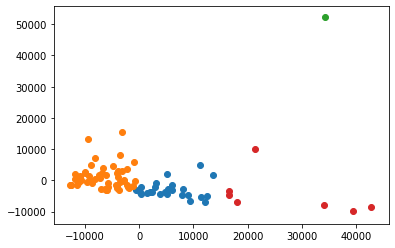

In [257]:
df_wholesale_1 = np.append(class1_data_pca,y_pred_wholesale_1.reshape(-1,1),axis=1)
# print(df)
for i in range(4):
    scatter_make(df_wholesale_1[np.any(df_wholesale_1 == i, axis=1)][:,0],\
                 df_wholesale_1[np.any(df_wholesale_1 == i, axis=1)][:,1])

In [258]:
# print(class1_data)
# print(type(class1_data))
classa_label = pd.DataFrame(y_pred_wholesale_1.reshape(-1,1),index=class1_data.index,columns=['group'])
# print(classa_label)
class1_data_label = pd.concat([class1_data, classa_label], axis=1)
for i in range(4):
    display(class1_data_label[class1_data_label['group'] == i].describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,group
count,25.00000,25.000000,25.000000,25.000000,25.00000,25.000000,25.0
mean,18779.76000,2388.120000,3360.840000,2866.040000,450.12000,1466.040000,0.0
std,4169.07483,2261.252259,2698.694155,2493.242275,409.75321,1410.028028,0.0
min,12680.00000,258.000000,489.000000,559.000000,28.00000,204.000000,0.0
25%,15603.00000,1222.000000,1447.000000,982.000000,178.00000,659.000000,0.0
50%,18226.00000,1801.000000,2576.000000,2216.000000,333.00000,925.000000,0.0
75%,22096.00000,3216.000000,3833.000000,3752.000000,586.00000,1854.000000,0.0
max,25977.00000,11487.000000,11593.000000,11422.000000,1679.00000,6854.000000,0.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,group
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0
mean,5686.240741,3449.833333,4038.740741,3198.981481,980.351852,887.888889,1.0
std,3528.081621,4298.338050,3172.584978,3382.225172,1359.790705,782.132225,0.0
min,3.000000,333.000000,572.000000,91.000000,5.000000,7.000000,1.0
25%,2200.750000,1023.000000,1927.250000,940.250000,210.750000,295.500000,1.0
50%,6055.500000,1878.500000,2840.000000,1753.500000,405.500000,693.000000,1.0
75%,8650.750000,3783.250000,5243.250000,4626.250000,902.750000,1116.000000,1.0
max,11800.000000,23527.000000,15538.000000,15601.000000,5828.000000,3636.000000,1.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,group
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,32717.0,16784.0,13626.0,60869.0,1272.0,5609.0,2.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,32717.0,16784.0,13626.0,60869.0,1272.0,5609.0,2.0
25%,32717.0,16784.0,13626.0,60869.0,1272.0,5609.0,2.0
50%,32717.0,16784.0,13626.0,60869.0,1272.0,5609.0,2.0
75%,32717.0,16784.0,13626.0,60869.0,1272.0,5609.0,2.0
max,32717.0,16784.0,13626.0,60869.0,1272.0,5609.0,2.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,group
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0
mean,39740.000000,4297.571429,6411.000000,5729.714286,590.428571,1627.285714,3.0
std,12000.548849,2700.519879,5283.967196,6028.719066,310.169769,1213.530210,0.0
min,29526.000000,489.000000,1495.000000,432.000000,111.000000,117.000000,3.0
25%,30129.500000,2451.000000,2951.500000,3029.000000,367.000000,716.500000,3.0
50%,31614.000000,4563.000000,4897.000000,3242.000000,730.000000,1391.000000,3.0
75%,50349.000000,6084.000000,7808.000000,5832.500000,795.500000,2564.500000,3.0
max,56083.000000,7961.000000,16966.000000,18711.000000,967.000000,3321.000000,3.0


都市部＊商業施設
グループ０とグループ１は購買傾向は近いもののFRESHの購入量のみ３倍の違いがあり、
グループ０に対してFRESHの販売促進を行う必要性を検証する必要がある

In [259]:
clf_wholesale = ScratchKMeans(n_clusters=4)
clf_wholesale.fit(class2_data_pca)
y_pred_wholesale_2 = clf_wholesale.predict(class2_data_pca)

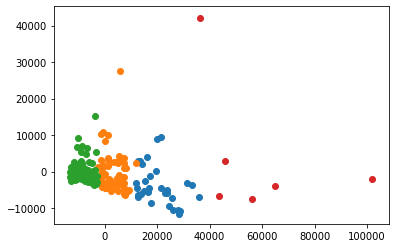

In [260]:
df_wholesale_2 = np.append(class2_data_pca,y_pred_wholesale_2.reshape(-1,1),axis=1)
# print(df)
for i in range(4):
    scatter_make(df_wholesale_2[np.any(df_wholesale_2 == i, axis=1)][:,0],\
                 df_wholesale_2[np.any(df_wholesale_2 == i, axis=1)][:,1])

In [262]:
classa_label = pd.DataFrame(y_pred_wholesale_2.reshape(-1,1),index=class2_data.index,columns=['group'])
# print(classa_label)
class2_data_label = pd.concat([class2_data, classa_label], axis=1)
for i in range(4):
    display(class2_data_label[class2_data_label['group'] == i].describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,group
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,33277.838710,4552.161290,4560.645161,4855.774194,620.967742,2068.903226,0.0
std,7151.502421,3967.601837,3098.313687,4243.118214,590.444210,2665.343660,0.0
min,24025.000000,286.000000,471.000000,127.000000,10.000000,3.000000,0.0
25%,27248.000000,1545.500000,2137.000000,1294.000000,147.500000,891.500000,0.0
50%,31012.000000,3749.000000,4469.000000,3881.000000,439.000000,1404.000000,0.0
75%,39010.500000,5017.500000,5428.500000,6840.000000,994.500000,2275.000000,0.0
max,49063.000000,16687.000000,16027.000000,15082.000000,2381.000000,14351.000000,0.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,group
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.0
mean,15403.545455,2850.151515,3556.727273,4601.272727,620.136364,1336.712121,1.0
std,3842.224725,3118.987727,3615.748887,5336.737374,907.105437,1910.996404,0.0
min,8533.000000,134.000000,3.000000,118.000000,3.000000,64.000000,1.0
25%,11916.500000,1180.250000,1703.750000,1351.500000,124.750000,422.500000,1.0
50%,15040.000000,1943.000000,2504.500000,2690.000000,305.500000,828.500000,1.0
75%,18684.000000,3480.000000,3834.000000,6399.500000,625.500000,1625.500000,1.0
max,23632.000000,21858.000000,21042.000000,35009.000000,5079.000000,14472.000000,1.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,group
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.0
mean,4385.138889,2972.277778,3482.777778,1952.351852,901.879630,951.555556,2.0
std,2970.855786,2635.932203,2973.529557,2484.323343,1251.537684,1025.162885,0.0
min,3.000000,55.000000,137.000000,25.000000,7.000000,3.000000,2.0
25%,2071.250000,1104.250000,1530.750000,487.250000,199.750000,316.250000,2.0
50%,3952.000000,2251.500000,2476.500000,1047.500000,385.000000,674.500000,2.0
75%,6411.750000,3787.500000,4356.250000,2396.000000,1067.000000,1147.000000,2.0
max,10290.000000,18664.000000,16483.000000,17866.000000,6907.000000,5137.000000,2.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,group
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,67737.833333,14253.333333,11306.166667,17756.500000,1401.333333,10871.833333,3.0
std,25575.020613,18080.493651,7193.859893,9974.703239,1797.890060,18351.173308,0.0
min,36847.000000,555.000000,902.000000,8692.000000,212.000000,918.000000,3.0
25%,56101.250000,3480.750000,7553.000000,11636.000000,367.000000,2429.000000,3.0
50%,62555.000000,3957.500000,10757.500000,16641.500000,764.500000,2707.000000,3.0
75%,74415.500000,23323.000000,16763.250000,17707.250000,1304.500000,7141.500000,3.0
max,112151.000000,43950.000000,20170.000000,36534.000000,4948.000000,47943.000000,3.0


In [ ]:
都市部＊小売業者
グループ３は各商品で平均に対して標準偏差が大きく、顧客属性に偏りがない場合はさらなるクラス分けを行い、営業戦略を立てる必要がある

In [263]:
clf_wholesale = ScratchKMeans(n_clusters=4)
clf_wholesale.fit(class3_data_pca)
y_pred_wholesale_3 = clf_wholesale.predict(class3_data_pca)

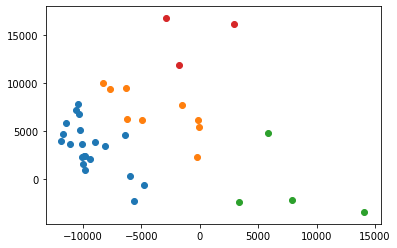

In [264]:
df_wholesale_3 = np.append(class3_data_pca,y_pred_wholesale_3.reshape(-1,1),axis=1)
# print(df)
for i in range(4):
    scatter_make(df_wholesale_3[np.any(df_wholesale_3 == i, axis=1)][:,0],\
                 df_wholesale_3[np.any(df_wholesale_3 == i, axis=1)][:,1])

In [265]:
classa_label = pd.DataFrame(y_pred_wholesale_3.reshape(-1,1),index=class3_data.index,columns=['group'])
# print(classa_label)
class3_data_label = pd.concat([class3_data, classa_label], axis=1)
for i in range(4):
    display(class3_data_label[class3_data_label['group'] == i].describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,group
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,2778.904762,7998.761905,13179.809524,1218.809524,6615.047619,1356.380952,0.0
std,2385.941783,4736.130202,5706.260523,1203.308049,3812.543226,1496.362439,0.0
min,18.000000,1897.000000,5234.000000,61.000000,788.000000,59.000000,0.0
25%,1073.000000,4560.000000,9785.000000,617.000000,4314.000000,531.000000,0.0
50%,2427.000000,7097.000000,12469.000000,913.000000,5952.000000,797.000000,0.0
75%,3062.000000,11103.000000,15445.000000,1285.000000,8933.000000,1468.000000,0.0
max,8090.000000,20655.000000,24773.000000,5612.000000,17120.000000,6372.000000,0.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,group
count,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.0
mean,7310.666667,13823.888889,21804.00000,2563.333333,9239.444444,1151.444444,1.0
std,3712.137457,5383.425291,8187.91431,2471.281196,4063.684231,632.595272,0.0
min,2532.000000,5989.000000,5615.00000,179.000000,955.000000,172.000000,1.0
25%,4484.000000,12867.000000,19847.00000,1128.000000,7558.000000,698.000000,1.0
50%,6468.000000,13316.000000,21570.00000,1809.000000,9606.000000,1102.000000,1.0
75%,11072.000000,14881.000000,24708.00000,3549.000000,12408.000000,1625.000000,1.0
max,11908.000000,25071.000000,36486.00000,8321.000000,14235.000000,2137.000000,1.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,group
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0
mean,20283.750000,4977.250000,7276.250000,3876.750000,2418.250000,2295.750000,2.0
std,4938.090884,2724.817593,3534.753021,5135.821932,1559.880417,832.161593,0.0
min,16448.000000,928.000000,2743.000000,824.000000,332.000000,1553.000000,2.0
25%,16729.250000,4672.750000,5455.750000,1229.750000,2009.000000,1892.000000,2.0
50%,18802.500000,6082.000000,7786.000000,1562.000000,2615.000000,2072.000000,2.0
75%,22357.000000,6386.500000,9606.500000,4209.000000,3024.250000,2475.750000,2.0
max,27082.000000,6817.000000,10790.000000,11559.000000,4111.000000,3486.000000,2.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,group
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,8939.333333,18813.000000,46859.333333,3871.000000,25368.666667,3068.666667,3.0
std,3010.008361,12257.884361,17961.938574,3391.271885,11034.935312,1960.563779,0.0
min,6134.000000,4980.000000,33586.000000,131.000000,18594.000000,1215.000000,3.0
25%,7349.500000,14056.500000,36640.000000,2433.500000,19002.000000,2042.500000,3.0
50%,8565.000000,23133.000000,39694.000000,4736.000000,19410.000000,2870.000000,3.0
75%,10342.000000,25729.500000,53496.000000,5741.000000,28756.000000,3995.500000,3.0
max,12119.000000,28326.000000,67298.000000,6746.000000,38102.000000,5121.000000,3.0


In [ ]:
郊外＊商業施設
サンプル数が少ない影響もあるが、視覚的にグループ分けが意味をなさないように思われる。
すでに顧客属性が１種類に絞られているか、営業戦略がないために十分な顧客フォローが行えてない可能性がある。

In [269]:
clf_wholesale = ScratchKMeans(n_clusters=3)
clf_wholesale.fit(class4_data_pca)
y_pred_wholesale_4 = clf_wholesale.predict(class4_data_pca)

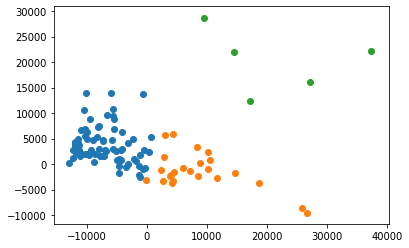

In [270]:
df_wholesale_4 = np.append(class4_data_pca,y_pred_wholesale_4.reshape(-1,1),axis=1)
# print(df)
for i in range(3):
    scatter_make(df_wholesale_4[np.any(df_wholesale_4 == i, axis=1)][:,0],\
                 df_wholesale_4[np.any(df_wholesale_4 == i, axis=1)][:,1])

In [272]:
classa_label = pd.DataFrame(y_pred_wholesale_4.reshape(-1,1),index=class4_data.index,columns=['group'])
# print(classa_label)
class4_data_label = pd.concat([class4_data, classa_label], axis=1)
for i in range(3):
    display(class4_data_label[class4_data_label['group'] == i].describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,group
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0
mean,4970.092105,9730.907895,14868.723684,1285.881579,6655.210526,1509.026316,0.0
std,3963.808257,5677.591502,7553.233163,1154.373088,4171.506485,1483.176977,0.0
min,23.000000,1275.000000,4814.000000,33.000000,813.000000,3.000000,0.0
25%,1416.500000,6259.250000,9532.500000,308.500000,3971.500000,425.750000,0.0
50%,4452.000000,8445.500000,12132.500000,933.500000,6217.000000,1316.500000,0.0
75%,8077.500000,11099.750000,19546.250000,1771.000000,7834.250000,1860.500000,0.0
max,12669.000000,29892.000000,45828.000000,5641.000000,24231.000000,7844.000000,0.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,group
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0
mean,21198.250000,6862.958333,11793.541667,1789.833333,4271.583333,2008.916667,1.0
std,7265.717268,3411.524069,7440.127301,1788.862686,3456.087634,1531.046187,0.0
min,13146.000000,1124.000000,4523.000000,42.000000,523.000000,57.000000,1.0
25%,16776.250000,4446.750000,7348.000000,788.500000,2173.250000,702.500000,1.0
50%,19250.000000,6232.500000,10392.000000,1274.500000,3517.500000,1825.500000,1.0
75%,22623.000000,8654.250000,12723.250000,2356.000000,5078.750000,2794.500000,1.0
max,40721.000000,15488.000000,34792.000000,8132.000000,14841.000000,5778.000000,1.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,group
count,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.0
mean,29164.60000,49749.200000,52416.40000,3640.600000,23221.200000,5770.400000,2.0
std,11147.10161,15033.782631,27508.80067,2892.609514,13129.341118,6361.387569,0.0
min,16117.00000,36423.000000,22019.00000,987.000000,4337.000000,903.000000,2.0
25%,22925.00000,38369.000000,32114.00000,1026.000000,20070.000000,2017.000000,2.0
50%,26373.00000,46197.000000,55571.00000,3254.000000,24171.000000,2944.000000,2.0
75%,35942.00000,54259.000000,59598.00000,5154.000000,26701.000000,6465.000000,2.0
max,44466.00000,73498.000000,92780.00000,7782.000000,40827.000000,16523.000000,2.0


In [ ]:
郊外＊小売業者
都市部の小売業者に対して、郊外の小売業者はFRESHの購入割合が相対的に低い。
郊外が都市部に対してFRESHの需要割合が低いとは考えにくく、購入割合が低いのには何らかの営業上の問題を抱えている可能性がある。

In [525]:
C = np.array([[[1],[2]],[[3],[4]],[[5],[6]]])
print(C.shape)
D = np.array([[[7],[8]],[[9],[10]],[[11],[12]]])

E = np.append(C,D, axis=2)
print(E[ 0, :, -2])
print(E[ 0, :, -1])
np.linalg.norm(E[ 0, :, -2] - E[ 0, :, -1]) + np.linalg.norm(E[ 1, :, -2] - E[ 1, :, -1]) + np.linalg.norm(E[ 2, :, -2] - E[ 2, :, -1])

(3, 2, 1)
[1 2]
[7 8]


25.45584412271571

In [111]:
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0, 0, 1, 1], polar=True)
# indexer = np.arange(0, 6) * 2 * np.pi / 6
# # print(indexer)
# purchasing_act = standardized_sample_data.T
# purchasing_act = purchasing_act.drop("class")
# print(purchasing_act)
# purchasing_act.append(purchasing_act.iloc[0]).plot(ax=ax)
# print(purchasing_act)

# purchasing_act.index = indexer
# # purchasing_act.plot(ax=ax)
# print(purchasing_act)
# # print(purchasing_act)#.iloc[0])
# # print(purchasing_act.iloc[0])
# # ax.set_xticks(indexer)
# ax.set_xticklabels(["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]);

# # Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
# # Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
# # Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
# # Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
# # Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
# # Delicassen  

In [112]:
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0.1, 0.1, 0.9, 0.9], polar=True)
# indexer = np.arange(1, 7) * 2 * np.pi / 6
# print(indexer)
# purchasing_act = data_0.groupby(pd.Grouper("class")).mean().T
# purchasing_act.index = indexer
# # purchasing_act.plot(ax=ax)
# purchasing_act.append(purchasing_act.iloc[0]).plot(ax=ax)
# ax.set_xticks(indexer)
# ax.set_xticklabels(["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]);